In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#statistic
from scipy import stats

#encoder

import warnings 
warnings.filterwarnings("ignore")

In [2]:
from mylibrary.get_data import ambilcsv

In [3]:
ambilcsv()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0


In [4]:
df = ambilcsv().copy()

In [5]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [10]:
df['year'] = df['date'].dt.year


In [38]:
df.drop(columns=['date_sales'],inplace=True,axis=1)

In [ ]:
df['month'] = df['date'].dt.year

In [39]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,2014
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,2015
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,2014
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,2015


In [35]:

df_meanyear = df.groupby('year').mean()
df_meanyear1 = df_meanyear.reset_index()
df_meanyear1

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,2014,539181.428415,3.377161,2.128904,2098.319073,14950.534272,1.502631,0.007791,0.233582,3.429919,7.681542,1802.015240,296.303834,1970.933985,90.978883
1,2015,541988.992264,3.357593,2.085100,2041.285100,15434.917192,1.476862,0.007020,0.235817,3.366476,7.605158,1759.827937,281.457163,1971.154298,70.614900


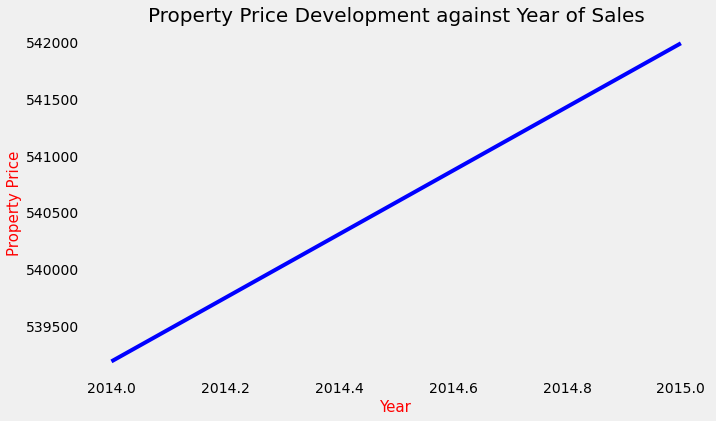

In [40]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 6))

x = df_meanyear1['year']
y = df_meanyear1['price'] 

plt.plot(x, y, 'blue')
plt.title('Property Price Development against Year of Sales',color='k', size=20)
plt.xlabel('Year',color='r', size=15) 
plt.ylabel('Property Price',color='r', size=15) 
plt.grid();

Grafik diatas menunjukan perkembangan harga penjualan rumah yang dimulai pada tahun 2014 dan berakhir pada tahun 2015 mengalami peningkatan yang signifikan

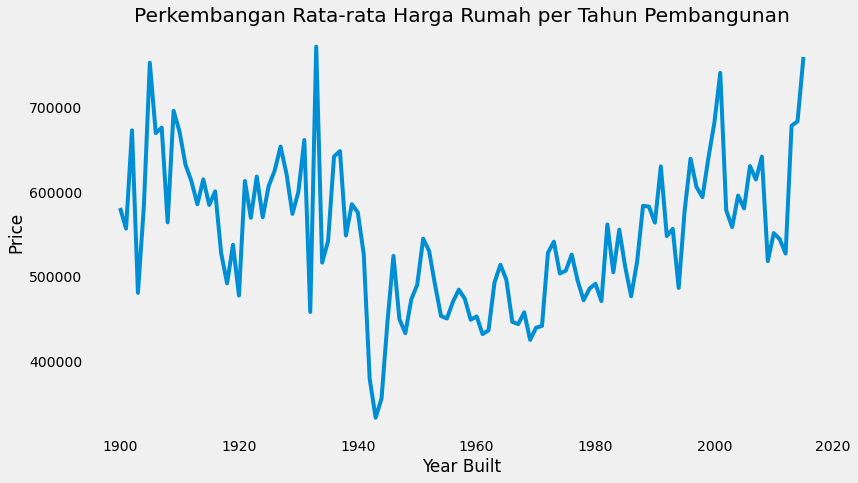

In [44]:
years = [year for year, df in df.groupby('yr_built')]
prices = df.groupby('yr_built').mean()['price']

plt.figure(figsize=(12,7))

plt.plot(years, prices)
plt.title('Perkembangan Rata-rata Harga Rumah per Tahun Pembangunan')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.grid()

plt.show()


By 1940 the amount of money spent on home building and/or construction (and/or home buying) in the late 1930s had surpassed the half a million dollar mark for the Lima area. This was most likely a result of the Federal Housing Administration (F.H.A.) involvement that started in the year 1934, and inflating cost of materials needed to build these homes.

Pada tahun 1940-an America mengalami krisi keungan yang cukup parah pasca dimulainya perang dunia ke-2, Pemerintah mengeluarkan biaya yang cukup banyak hingga jutaan dolar tak terkecuali untuk pembangunan perumahan.Dari grafik diatas menunjukan bahwa rumah yang dibangun pada 1940-an memiliki harga yang sangat rendah.

In [70]:
top_price_house_by_builtyear= df.groupby(by="yr_built").mean().sort_values('sqft_lot',ascending=False).reset_index().head(10)
top_price_house_by_builtyear

,yr_built,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,year
0,1933,772050.000000,3.133333,2.008333,2193.000000,42373.100000,1.483333,0.033333,0.933333,3.266667,7.466667,1748.000000,445.000000,464.233333,2014.433333
1,1991,630440.915179,3.482143,2.545759,2622.946429,34323.321429,1.801339,0.013393,0.325893,3.214286,8.540179,2424.955357,197.991071,8.982143,2014.263393
2,1980,491723.045833,3.441667,2.220833,2103.295833,30147.925000,1.293750,0.012500,0.208333,3.441667,7.625000,1716.595833,386.700000,50.133333,2014.341667
3,1992,548169.308081,3.474747,2.522727,2402.161616,28574.570707,1.795455,0.005051,0.191919,3.191919,8.308081,2260.989899,141.171717,0.000000,2014.353535
4,1915,584896.296875,3.234375,1.750000,1726.093750,27459.468750,1.382812,0.031250,0.546875,3.687500,6.859375,1390.625000,335.468750,340.640625,2014.500000
5,2000,681789.169725,3.527523,2.755734,2646.307339,26207.802752,2.032110,0.009174,0.325688,3.018349,8.587156,2443.357798,202.949541,0.000000,2014.353211
6,1989,582961.679310,3.486207,2.525000,2442.482759,25437.186207,1.732759,0.013793,0.251724,3.296552,8.341379,2257.517241,184.965517,6.896552,2014.289655
7,1995,577771.035503,3.437870,2.520710,2410.284024,25355.704142,1.843195,0.000000,0.230769,3.106509,8.301775,2241.053254,169.230769,0.000000,2014.343195
8,1931,661617.213115,3.311475,1.889344,1949.016393,25039.081967,1.426230,0.032787,0.327869,3.819672,7.377049,1475.409836,473.606557,131.278689,2014.278689
9,1997,606058.067797,3.581921,2.658192,2513.994350,24979.937853,1.892655,0.000000,0.293785,3.073446,8.446328,2375.971751,138.022599,0.000000,2014.338983


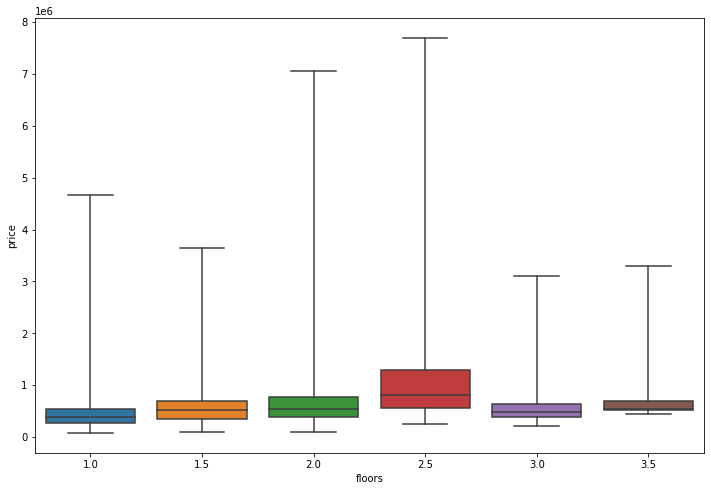

In [17]:

plt.figure(figsize=(12,8))
sns.boxplot(x='floors',y="price" ,data=df,whis=(0,100));

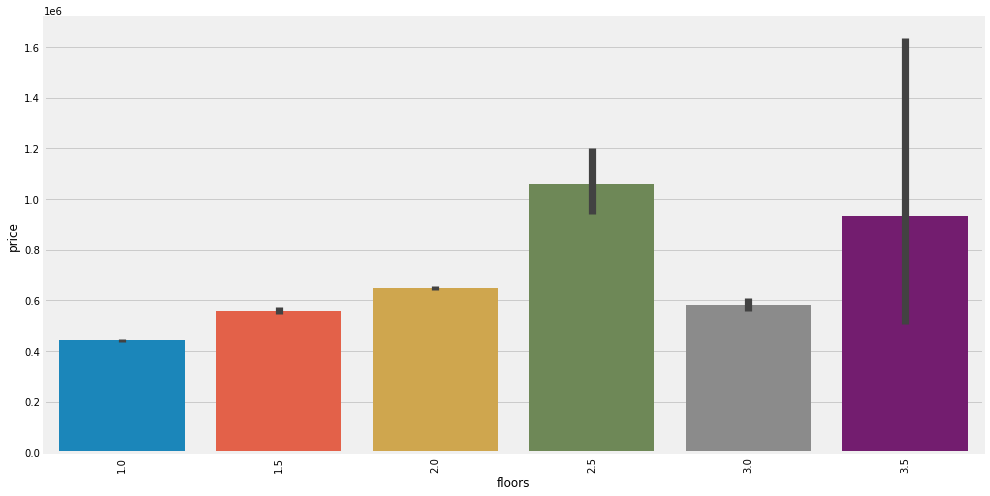

In [59]:
plt.figure(figsize=(15,8))
sns.barplot(x="floors",y="price",data=df)
plt.xticks(rotation=90);

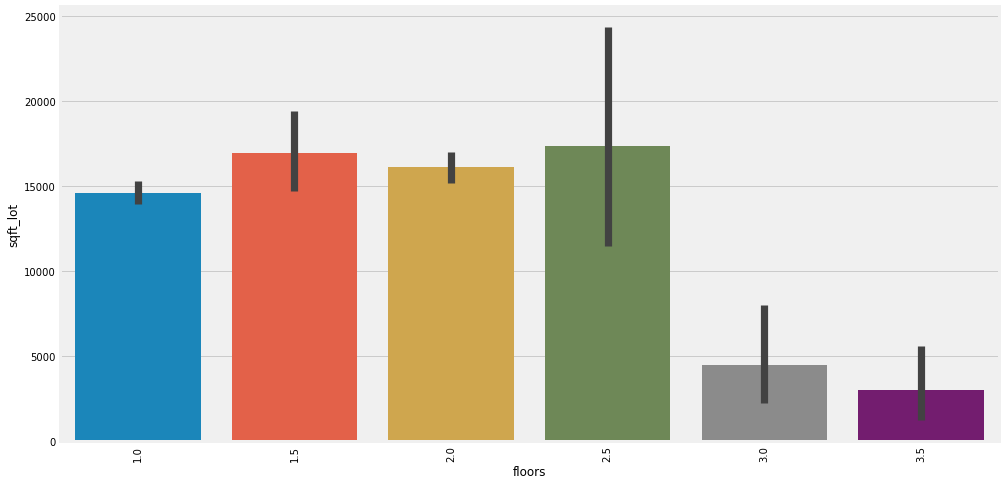

In [72]:
plt.figure(figsize=(15,8))
sns.barplot(x="floors",y="sqft_lot",data=df)
plt.xticks(rotation=90);

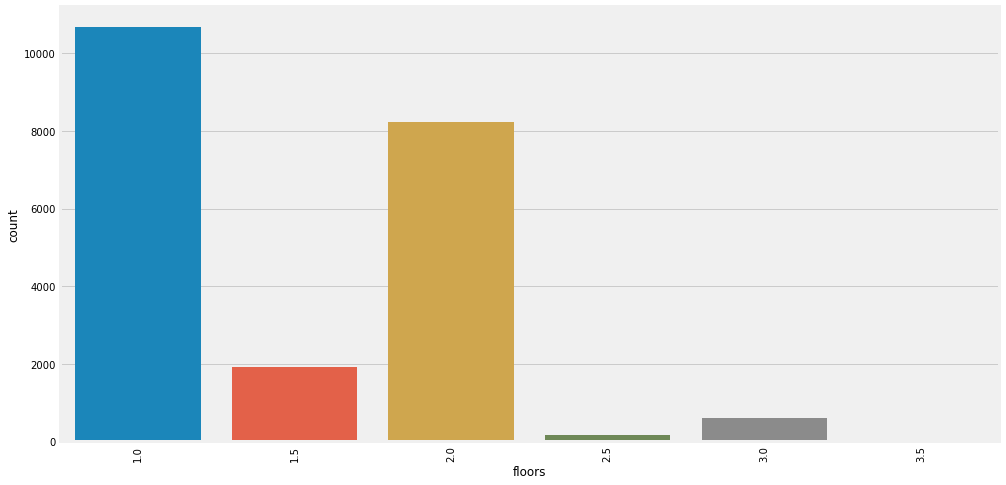

In [71]:
plt.figure(figsize=(15,8))
sns.countplot(df['floors'])
plt.xticks(rotation=90);

In [69]:
top_price_house_by_floor= df.groupby(by="floors").mean().sort_values('sqft_lot',ascending=False).reset_index().head(1)
top_price_house_by_builtyear

,floors,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,year
0,2.5,1.060346e+06,3.987578,2.835404,3145.428571,17347.291925,0.012422,0.509317,3.478261,8.89441,2789.857143,355.571429,1961.310559,223.503106,2014.267081


In [ ]:
top_price_house_by_builtyear= df.groupby(by="floors").mean().sort_values('sqft_lot',ascending=False).reset_index().head(1)
top_price_house_by_builtyear

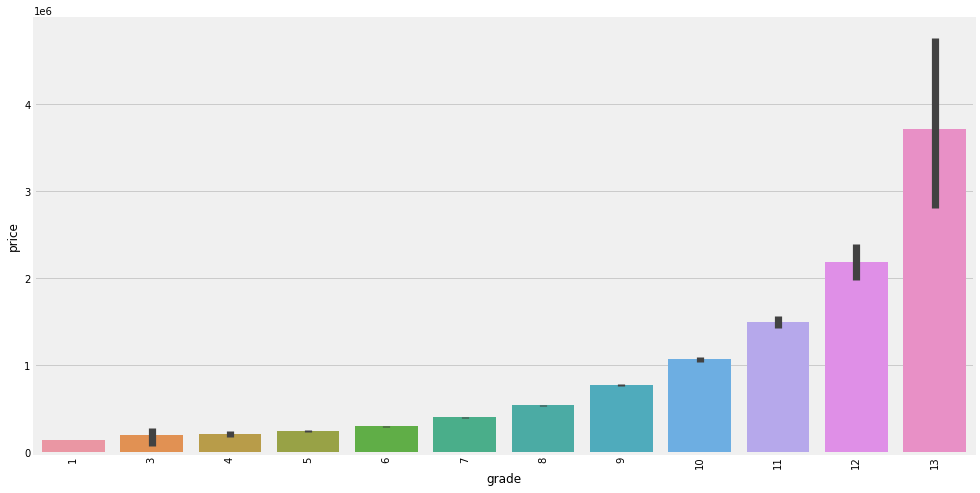

In [76]:
plt.figure(figsize=(15,8))
sns.barplot(x="grade",y="price",data=df)
plt.xticks(rotation=90);

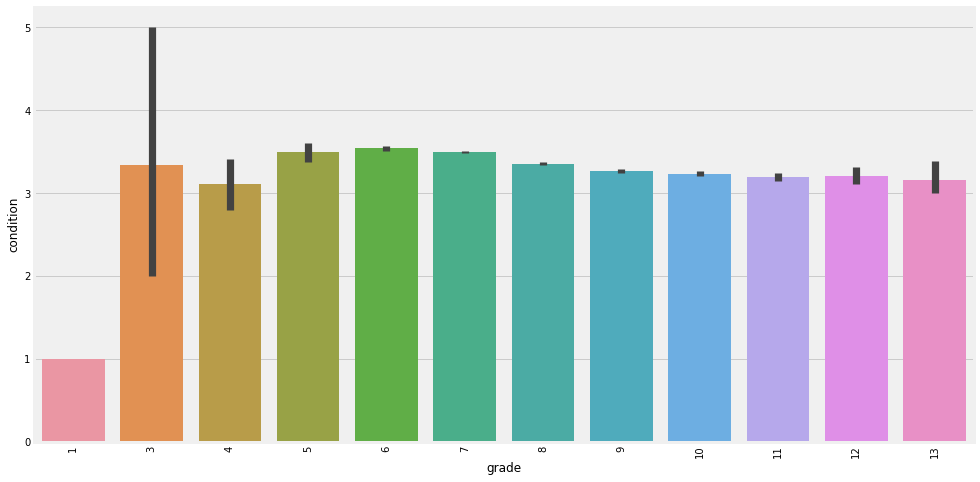

In [89]:
plt.figure(figsize=(15,8))
sns.barplot(x="grade",y="condition",data=df)
plt.xticks(rotation=90);

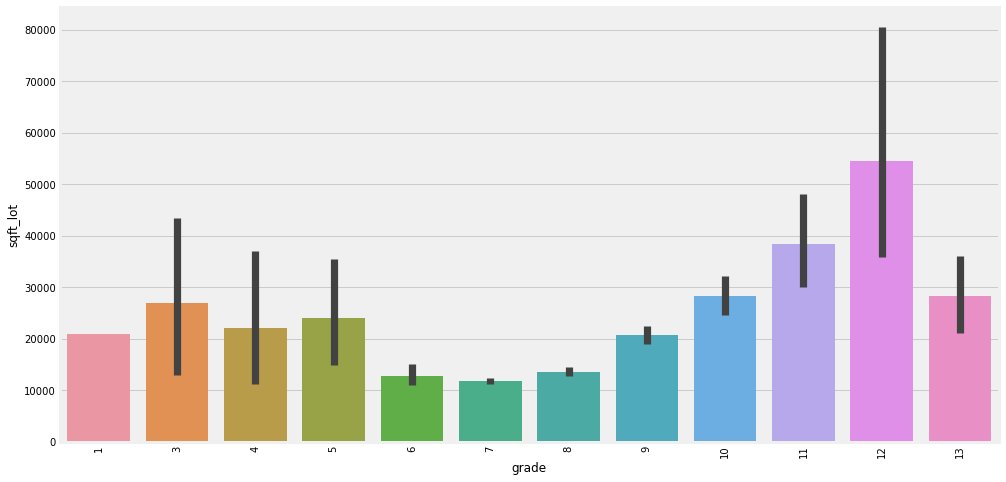

In [78]:
plt.figure(figsize=(15,8))
sns.barplot(x="grade",y="sqft_lot",data=df)
plt.xticks(rotation=90);

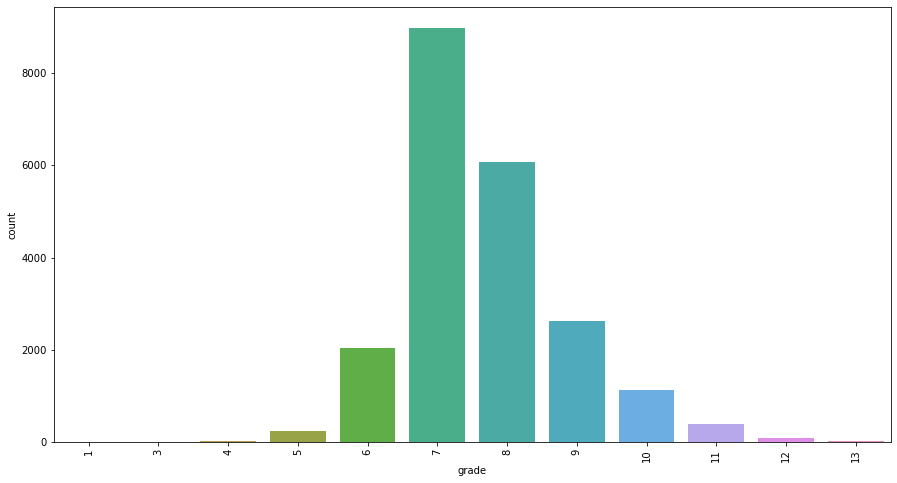

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(df['grade'])
plt.xticks(rotation=90);

In [80]:
top_price_house_by_builtyear= df.groupby(by="grade").mean().sort_values('condition',ascending=False).reset_index().head(10)
top_price_house_by_builtyear

,grade,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year
0,6,3.019196e+05,2.685967,1.243499,1191.561335,12646.953876,1.108685,0.005888,0.092738,3.539745,1068.647694,122.913641,1942.471050,94.600589,2014.350343
1,5,2.485240e+05,2.388430,1.113636,983.326446,24019.909091,1.086777,0.016529,0.136364,3.491736,944.607438,38.719008,1935.454545,49.318182,2014.363636
2,7,4.025903e+05,3.255651,1.829251,1689.400401,11766.438481,1.297406,0.002561,0.099766,3.491259,1408.529562,280.870838,1963.626545,74.556620,2014.330141
3,8,5.428528e+05,3.479895,2.348179,2184.748517,13510.186552,1.668177,0.006592,0.246539,3.355471,1867.411668,317.336849,1980.400461,87.293013,2014.317897
4,3,2.056667e+05,1.000000,0.250000,596.666667,26953.000000,1.000000,0.000000,0.000000,3.333333,596.666667,0.000000,1945.333333,0.000000,2014.666667
5,9,7.735132e+05,3.773231,2.664340,2868.139962,20638.515488,1.849140,0.009560,0.429446,3.266157,2554.395411,313.744551,1988.419120,105.624092,2014.300956
6,10,1.071771e+06,3.907407,3.006393,3520.299824,28191.063492,1.892857,0.024691,0.654321,3.232804,3112.086420,408.213404,1989.569665,88.225750,2014.291005
7,12,2.191222e+06,4.222222,3.980556,5471.588889,54521.311111,1.950000,0.122222,1.622222,3.211111,4649.300000,822.288889,1992.377778,66.488889,2014.366667
8,11,1.496842e+06,4.160401,3.501880,4395.448622,38372.789474,1.961153,0.050125,1.030075,3.195489,3853.182957,542.265664,1992.145363,75.080201,2014.298246
9,13,3.709615e+06,4.846154,5.096154,7483.076923,28204.769231,1.961538,0.000000,1.846154,3.153846,6060.769231,1422.307692,1976.615385,460.923077,2014.230769


(30, 16)